**Examen Diagnóstico**

Curso: Estadística Aplicada,  2018

Alumno: Emiliano López

**Ejercicio 3**

**a).** Plantear las hipótesis a testear en este problema definiendo el parámetro involucrado.

En este caso debemos hacer un *test de medias* planteando las siguientes hipótesis:

- H0: $\mu = 70 $ MPa
- H1: $\mu > 70 $ MPa

**b)** ¿Para qué valores del promedio muestral de las resistencias a la compresión registradas la empresa confirmará su decisión de comprar el cemento óseo ofrecido?

Calculamos el punto crítico, a partir del cual comienza la zona de rechazo (H1)

In [7]:
# datos 
mu0 = 70
alpha = 0.05
sigma = 5
n = 10

# calculamos el punto crítico
zc = qnorm(1-alpha, mean=mu0, sd=sigma/sqrt(n)) # 
zc

[1] 72.60074

Graficamos esta distribución con su punto crítico

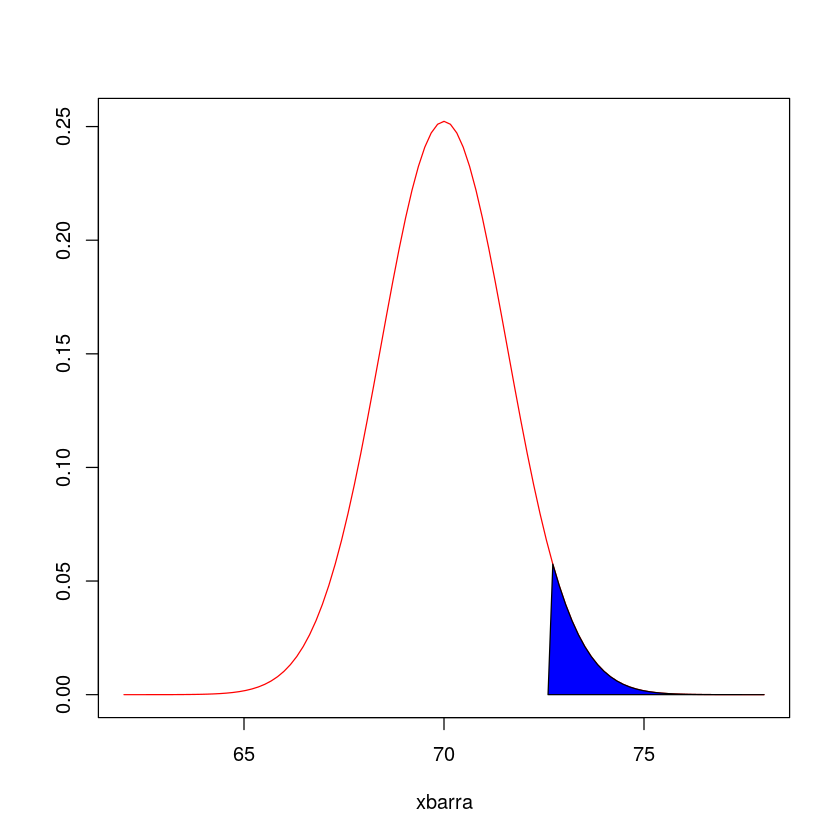

In [39]:
f = curve(dnorm(x, mu0, sigma/sqrt(n)), col = "red", xlim = c(mu0-sigma-3, mu0+sigma+3), xlab = 'xbarra', ylab = '')
polygon(c(zc, f$x[f$x >= zc]), c(0,f$y[f$x >=zc]), col = "blue")

**c)** ¿Cuál es la probabilidad de no comprar el cemento ofrecido si su resistencia media a la compresión axial es de 71.2 MPa?

Primeramente solapamos las dos curvas, con media $\mu_0$ y media $\mu_1$

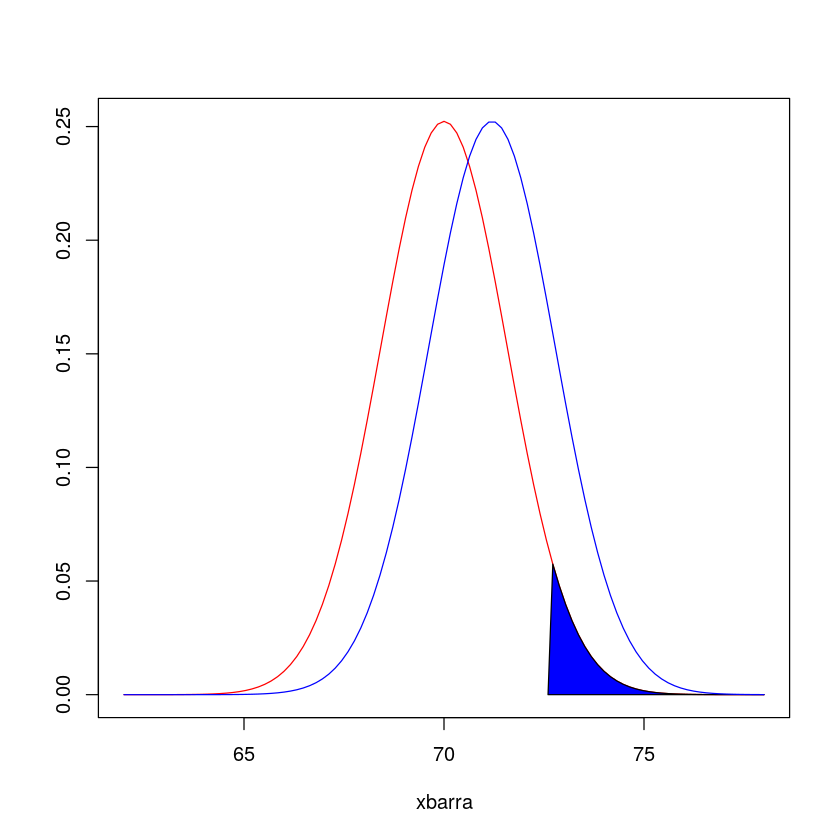

In [40]:
mu1 = 71.2
f = curve(dnorm(x, mu0, sigma/sqrt(n)), col = "red", xlim = c(mu0-sigma-3, mu0+sigma+3), xlab = 'xbarra', ylab = '')
polygon(c(zc, f$x[f$x >= zc]), c(0,f$y[f$x >=zc]), col = "blue")
f = curve(dnorm(x, mu1, sigma/sqrt(n)), add=TRUE,col = "blue", xlim = c(mu0-sigma-3, mu0+sigma+3), xlab = 'xbarra', ylab = '')

Luego, calculamos la probabilidad del error de tipo II haciendo:

In [41]:
pnorm(zc, mean=mu1, sd=sigma/sqrt(n))

[1] 0.8121662

Es el área (probabilidad acumulada) en la que se solapan ambas distribuciones hasta el punto crítico $z_c$

**d)** ¿De cuántas muestras de cemento deberá constar la muestra para que la probabilidad de (c) sea a lo sumo 0.10?

In [51]:
for (i in 1:1000){
    zc = qnorm(1-alpha, mean=mu0, sd=sigma/sqrt(i)) 
    probabilidad = pnorm(zc, mean=mu1, sd=sigma/sqrt(i))
    if (probabilidad <= 0.1){
        print(i)
        break
    }
}

[1] 149


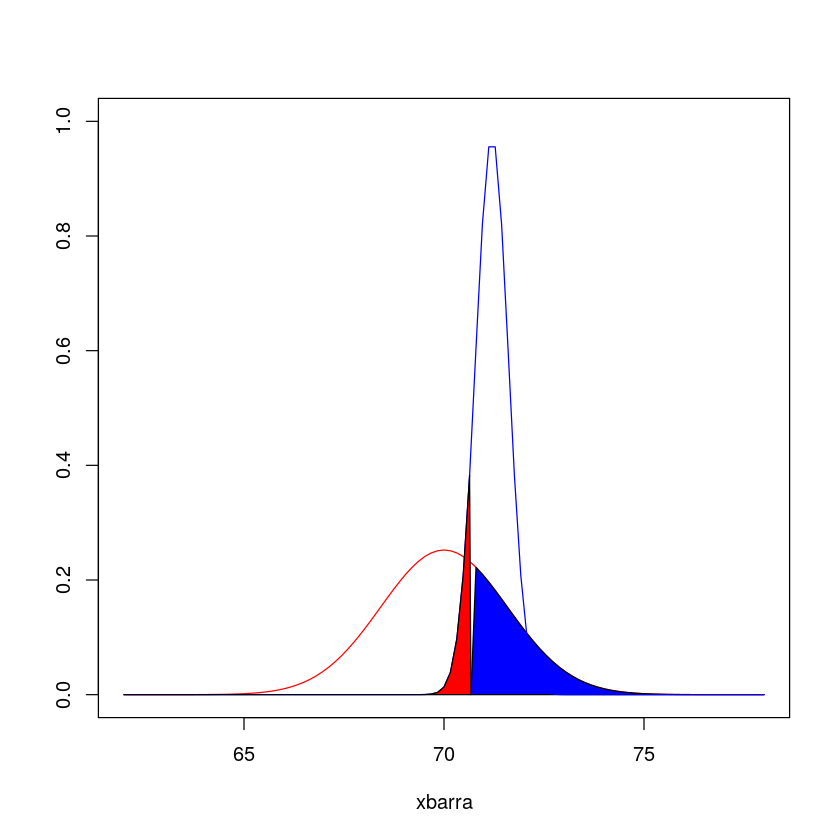

In [56]:
f = curve(dnorm(x, mu0, sigma/sqrt(n)), col = "red", ylim = c(0,1), xlim = c(mu0-sigma-3, mu0+sigma+3), xlab = 'xbarra', ylab = '')
polygon(c(zc, f$x[f$x >= zc]), c(0,f$y[f$x >=zc]), col = "blue")
f = curve(dnorm(x, mu1, sigma/sqrt(i)), add=TRUE,col = "blue", ylim = c(0,1), xlim = c(mu0-sigma-3, mu0+sigma+3), xlab = 'xbarra', ylab = '')
polygon(c(zc, f$x[f$x < zc]), c(0,f$y[f$x <zc]), col = "red")

**e)** El experimento realizado por la clı́nica con las n = 10 muestras de cemento dio como resultado que se rechaza la hipótesis nula a nivel α = 0.05 pero no a nivel α = 0.01. Indique qué valores pudo haber tomado el promedio muestral de los 10 valores de resistencia a la compresión axial registrados.

In [57]:
# datos 
mu0 = 70
alpha = 0.01
sigma = 5
n = 10

# calculamos el punto crítico para un alpha de 0.01
zc = qnorm(1-alpha, mean=mu0, sd=sigma/sqrt(n)) # 
zc

[1] 73.67828

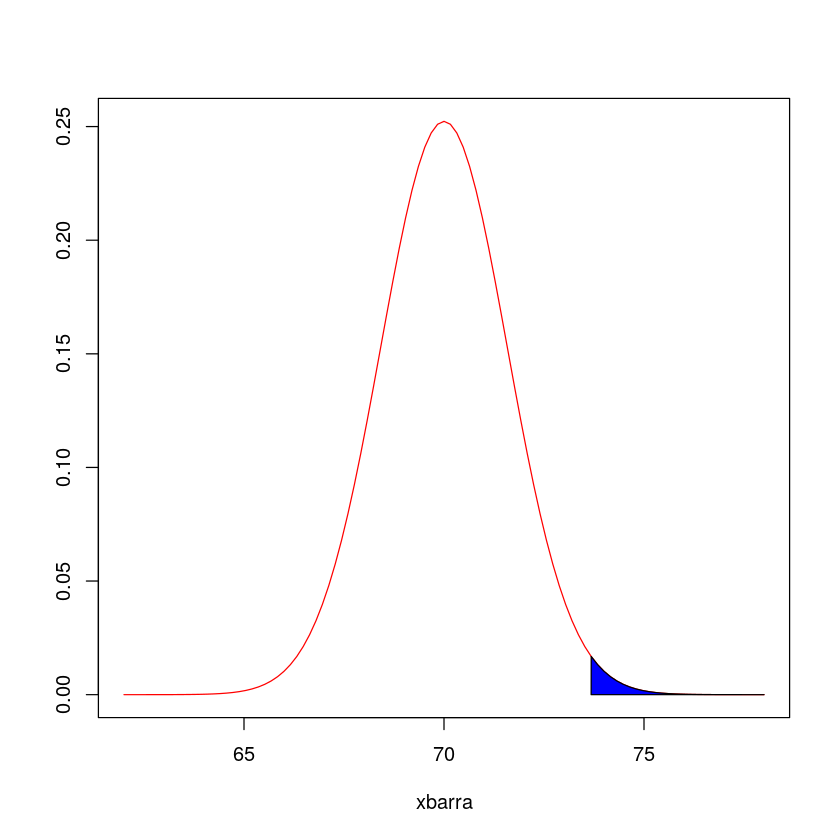

In [59]:
f = curve(dnorm(x, mu0, sigma/sqrt(n)), col = "red", xlim = c(mu0-sigma-3, mu0+sigma+3), xlab = 'xbarra', ylab = '')
polygon(c(zc, f$x[f$x >= zc]), c(0,f$y[f$x >=zc]), col = "blue")